# Hard Way vs Pandas 

In [74]:
import os
import json

In [75]:
path = '../datasets/bitly_usagov/example.txt'
os.listdir('../datasets/bitly_usagov')

['example.txt']

In [76]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [77]:
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [78]:
records[0]['tz']

'America/New_York'

### How many timezones are there? 
### Observe that some keys can not be found, meaning some records have no 'tz'
time_zones = [i['tz'] for i in records]

time_zones

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
 in 
      1 # How many timezones are there?
----> 2 time_zones = [i['tz'] for i in records]
      3 time_zones

 in (.0)
      1 # How many timezones are there?
----> 2 time_zones = [i['tz'] for i in records]
      3 time_zones

KeyError: 'tz'

In [79]:

time_zones = [i['tz'] for i in records if 'tz' in i]
len(time_zones)

3440

In [80]:
# Hard way: Create a few methods  
def get_counts(seq):
    counts = {}
    for i in seq:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1
    #print(counts)
    return counts

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [81]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [82]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

# Please use Pandas!

In [83]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib as plot

In [84]:
df_records = DataFrame(records)
df_csv = pd.read_csv(path, sep="] }")

In [108]:
#df_records

In [86]:
df_records['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [87]:
# the df_csv frame is broken...
# df_csv 


In [91]:
# the object "df_records['tz']" has methods, not sure how to show them all..
tz_counts = df_records['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [92]:
# In order to plot data using matplot, substitute empty or unknown 'tz's
tz_clean = df_records['tz'].fillna('Missing')
tz_clean[tz_clean == ''] = 'Unknown'

tz_counts = tz_clean.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

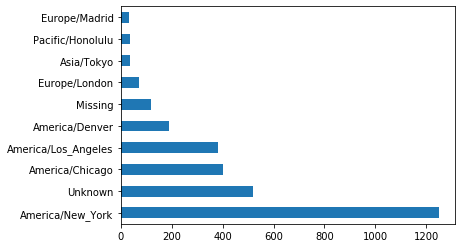

In [93]:
# Let's plot 
tz_counts[:10].plot(kind = 'barh', rot = 0)

In [109]:
# The strings seem daunting, but one could make another summary based on Browser Agents:
results = Series([x.split()[0] for x in df_records.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [110]:
results.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [111]:
# There is also an OS string. Lets exclude missing data:
df_os = df_records[df_records.a.notnull()]
#df_os


In [114]:
# Is each row Windows or not
ops = np.where(df_os['a'].str.contains('Windows'), 'Windows', 'Not Windows')
ops[:5]

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [117]:
# Now group the data by TZ and OPS
by_tz_os = df_os.groupby(['tz', ops])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [119]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [122]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


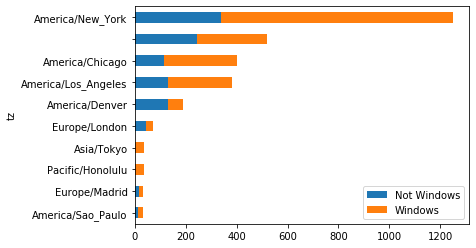

In [125]:
count_subset.plot(kind = 'barh', stacked = True)

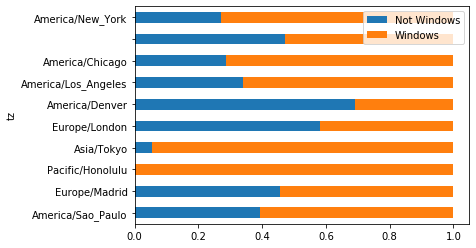

In [132]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind = 'barh', stacked = True)